In [1]:

!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-2fdb473f-778b-a50a-361c-027806356551)


In [2]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 36.08 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [3]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [4]:
data_dir="pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [5]:
import os
filenames=[data_dir + filename for filename in os.listdir(data_dir)]

In [6]:
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

In [7]:
def get_lines(filename):
  with open(filename, "r")  as f:
    return f.readlines()

In [8]:
train_lines=get_lines(data_dir + "train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [9]:
def preprocess_text_with_line_numbers(filename):
  input_lines=get_lines(filename)
  abstract_lines=""
  abstract_samples=[]


  for line in input_lines:

    if line.startswith("###"):

      abstract_id=line
      abstract_lines=""

    elif line.isspace():
      abstract_line_split=abstract_lines.splitlines()
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data={}
        target_text_split=abstract_line.split("\t")
        line_data["target"]=target_text_split[0]
        line_data["text"]=target_text_split[1].lower()
        line_data["line_number"]=abstract_line_number
        line_data["total_lines"]=len(abstract_line_split)-1
        abstract_samples.append(line_data)
    else:
      abstract_lines +=line
  return abstract_samples

In [10]:
%%time
train_samples=preprocess_text_with_line_numbers(data_dir +"train.txt")
val_samples=preprocess_text_with_line_numbers(data_dir + "dev.txt")
test_samples=preprocess_text_with_line_numbers(data_dir+"test.txt")
len(train_samples),len(val_samples), len(test_samples)

CPU times: user 758 ms, sys: 127 ms, total: 885 ms
Wall time: 2.12 s


(180040, 30212, 30135)

In [11]:
train_samples[:14]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [12]:
import pandas as pd
train_df=pd.DataFrame(train_samples)
val_df=pd.DataFrame(val_samples)
test_df=pd.DataFrame(test_samples)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [13]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

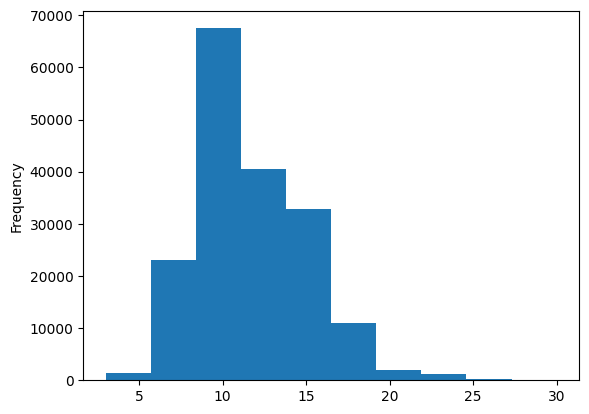

In [14]:
train_df.total_lines.plot.hist();


In [15]:
train_sentences=train_df["text"].tolist()
val_sentences=val_df["text"].tolist()
test_sentences=test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [16]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [17]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder= OneHotEncoder(sparse=False)
train_labels_one_hot=one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot=one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot=one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))

train_labels_one_hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_labels_encoded=label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded=label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded=label_encoder.transform(test_df["target"].to_numpy())
train_labels_encoded


array([3, 2, 2, ..., 4, 1, 1])

In [19]:
num_classes=len(label_encoder.classes_)
class_names=label_encoder.classes_
num_classes, class_names


(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0=Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())

])

model_0.fit(X=train_sentences,
            y=train_labels_encoded);


In [21]:
model_0.score(X=val_sentences,
              y=val_labels_encoded)

0.7218323844829869

In [22]:
baseline_preds=model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [23]:

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-03-24 13:42:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-03-24 13:42:20 (61.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [24]:
from helper_functions import calculate_results

In [25]:
baseline_results=calculate_results(y_true=val_labels_encoded,
                                   y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [27]:
sent_lens=[len(sentence.split()) for sentence in train_sentences]
avg_sent_len=np.mean(sent_lens)
avg_sent_len

26.338269273494777

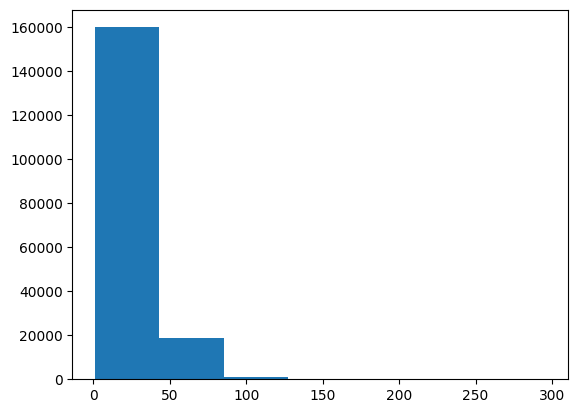

In [28]:
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7);

In [29]:
output_seq_len=int(np.percentile(sent_lens,95))
output_seq_len

55

In [30]:
max(sent_lens)

296

In [31]:
max_tokens=68000


In [32]:
from tensorflow.keras.layers import TextVectorization
text_vectorizer=TextVectorization(max_tokens,
                                  output_sequence_length=55)

In [33]:
text_vectorizer.adapt(train_sentences)

In [34]:
import random
target_sentence= random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text:{len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")

Text:
we noticed a clinical improvement in both groups without particular differences , but the iip scores went through a significant higher enhancement only in stpp group .

Length of text:27

Vectorized text:
[[   43  8215     8    47   194     5    54    24   159  2242   102    72
      2 38020   119  9795   313     8    37    82  2537   192     5 11833
     13     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [35]:
rct_20k_text_vocab=text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary:{len(rct_20k_text_vocab)}"),
print(f"Most common words in the vocabulary{rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary:{rct_20k_text_vocab[:--5:]}")


Number of words in vocabulary:64841
Most common words in the vocabulary['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary:['', '[UNK]', 'the', 'and', 'of']


In [36]:
text_vectorizer.get_config()


{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [37]:
token_embed=layers.Embedding(input_dim=len(rct_20k_text_vocab),
                             output_dim=128,
                             mask_zero=True,
                             name="token_embedding")
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence=text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence=token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape:{embedded_sentence.shape}")

Sentence before vectorization:
we noticed a clinical improvement in both groups without particular differences , but the iip scores went through a significant higher enhancement only in stpp group .

Sentence after vectorization (before embedding):
[[   43  8215     8    47   194     5    54    24   159  2242   102    72
      2 38020   119  9795   313     8    37    82  2537   192     5 11833
     13     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Sentence after embedding:
[[[ 0.01632538 -0.04372605 -0.03210314 ... -0.04257883  0.00378709
   -0.04384774]
  [ 0.03368001  0.04162519  0.00941497 ...  0.04077779  0.02315596
   -0.02461017]
  [-0.01655953 -0.01620041 -0.03169143 ... -0.04004053 -0.02567543
    0.04730609]
  ...
  [-0.01228599 -0.02467252  0.04963312 ... -0.00640012 -0.01550703
   -0.00858928]
  [-0.01228599 -0.02467252  0.04963312 ... -

In [38]:
train_dataset=tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset=tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))
test_dataset=tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))

In [39]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [40]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [41]:
inputs=layers.Input(shape=(1,), dtype=tf.string)
text_vectors=text_vectorizer(inputs)
token_embeddings=token_embed(text_vectors)
x=layers.Conv1D(64,kernel_size=5, padding="same", activation="relu")(token_embeddings)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(num_classes,activation="softmax")(x)
model_1=tf.keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [42]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                             

In [43]:
model_1_history=model_1.fit(train_dataset,
                            steps_per_epoch=int(0.1 *len(train_dataset)),
                            epochs=3,
                            validation_data=valid_dataset,
                            validation_steps=int(0.1 *len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 21s 31ms/step - loss: 0.9189 - accuracy: 0.6372 - val_loss: 0.6844 - val_accuracy: 0.7387
Epoch 2/3
562/562 [==============================] - 5s 9ms/step - loss: 0.6560 - accuracy: 0.7588 - val_loss: 0.6294 - val_accuracy: 0.7723
Epoch 3/3
562/562 [==============================] - 5s 8ms/step - loss: 0.6171 - accuracy: 0.7746 - val_loss: 0.5983 - val_accuracy: 0.7832


In [44]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5991 - accuracy: 0.7864


[0.5990938544273376, 0.7863762974739075]

In [45]:
model_1_pred_probs=model_1.predict(valid_dataset)
model_1_pred_probs

945/945 [==============================] - 2s 2ms/step


array([[4.7219247e-01, 1.4476816e-01, 8.3888628e-02, 2.7348155e-01,
        2.5669152e-02],
       [3.8520357e-01, 3.3236018e-01, 1.5824115e-02, 2.5749257e-01,
        9.1195935e-03],
       [1.4874047e-01, 7.0587876e-03, 1.8414861e-03, 8.4232438e-01,
        3.4923243e-05],
       ...,
       [6.7990341e-06, 5.8862288e-04, 6.0314772e-04, 3.0511239e-06,
        9.9879837e-01],
       [5.7659559e-02, 4.4841099e-01, 8.8470034e-02, 6.8044625e-02,
        3.3741480e-01],
       [1.7628397e-01, 6.4564985e-01, 3.8301215e-02, 6.2005591e-02,
        7.7759363e-02]], dtype=float32)

In [46]:
model_1_preds=tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [47]:
model_1_results=calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_1_preds)
model_1_results


{'accuracy': 78.63762743280816,
 'precision': 0.7834604895738002,
 'recall': 0.7863762743280815,
 'f1': 0.7838567887796998}

In [48]:
import tensorflow_hub as hub
tf_hub_embedding_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                      trainable=False,
                                      name="universal_sentence_encoder")

In [49]:
random_training_sentence=random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence=tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]}(truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
after attending the educational program , the intervention group completed a post-education survey .

Sentence after embedding:
[ 0.06216593 -0.00900402  0.00295268  0.0217516  -0.06248876 -0.0316954
  0.01534041 -0.03570174 -0.00685949 -0.01429785 -0.00627859  0.03923663
  0.06689743 -0.01027553  0.0309433   0.01415398 -0.05795601  0.0165777
 -0.02748075 -0.09224804 -0.0768586   0.07951621 -0.06763655  0.01169924
 -0.06684256 -0.01665546 -0.07956241  0.00947384 -0.01805516 -0.05696472](truncated output)...

Length of sentence embedding:
512


In [50]:
inputs=layers.Input(shape=[], dtype=tf.string)
pretrained_embedding=tf_hub_embedding_layer(inputs)
x=layers.Dense(128,activation="relu")(pretrained_embedding)
outputs=layers.Dense(5,activation="softmax")(x)

model_2=tf.keras.Model(inputs=inputs,
                       outputs=outputs)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [51]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder  (None, 512)               256797824 
  (KerasLayer)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [52]:
model_2.fit(train_dataset,
            steps_per_epoch=int(0.1*len(train_dataset)),
            epochs=3,
            validation_data=valid_dataset,
            validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 10s 14ms/step - loss: 0.9206 - accuracy: 0.6507 - val_loss: 0.7953 - val_accuracy: 0.6932
Epoch 2/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7667 - accuracy: 0.7041 - val_loss: 0.7508 - val_accuracy: 0.7035
Epoch 3/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7476 - accuracy: 0.7156 - val_loss: 0.7329 - val_accuracy: 0.7151


In [53]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 10s 10ms/step - loss: 0.7373 - accuracy: 0.7160


[0.737305223941803, 0.716006875038147]

In [54]:
model_2_pred_probs=model_2.predict(valid_dataset)
model_2_pred_probs

945/945 [==============================] - 10s 10ms/step


array([[0.44106433, 0.3356812 , 0.00242201, 0.21321657, 0.00761586],
       [0.3338739 , 0.50273055, 0.00440062, 0.1566202 , 0.00237477],
       [0.23661022, 0.15969786, 0.01742703, 0.5481363 , 0.03812859],
       ...,
       [0.00205221, 0.00607918, 0.05094698, 0.00104526, 0.9398764 ],
       [0.00440437, 0.04762442, 0.19816037, 0.00195485, 0.747856  ],
       [0.16220176, 0.21437298, 0.55960345, 0.00634638, 0.05747539]],
      dtype=float32)

In [55]:
model_2_preds=tf.argmax(model_2_pred_probs, axis=1)
model_2_preds


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [56]:
model_2_results=calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_2_preds)
model_2_results

{'accuracy': 71.60068846815835,
 'precision': 0.7171773109628695,
 'recall': 0.7160068846815835,
 'f1': 0.713202845297335}

In [57]:
def split_chars(text):
  return " ".join(list(text))

  split_chars(random_training_sentence)

In [58]:
train_chars=[split_chars(sentence) for sentence in train_sentences]
val_chars=[split_chars(sentence) for sentence in val_sentences]
test_chars=[split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [59]:
char_lens=[len(sentence) for sentence in train_sentences]
mean_char_len=np.mean(char_lens)
mean_char_len

149.3662574983337

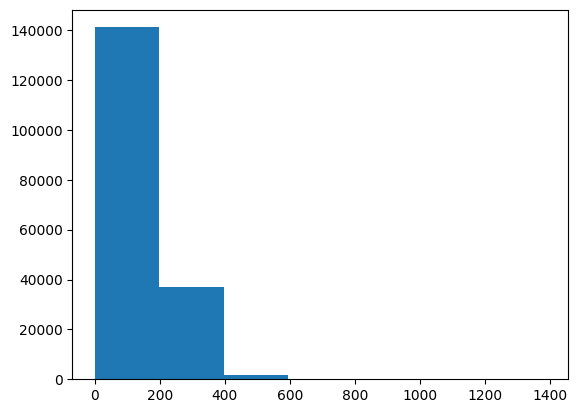

In [60]:
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

In [61]:
output_seq_char_len=int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [62]:
import string
alphabet =string.ascii_lowercase +string.digits +string.punctuation
alphabet


'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
NUM_CHAR_TOKENS=len(alphabet) +2
char_vectorizer=TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                  output_sequence_length=output_seq_char_len,
                                  standardize="lower_and_strip_punctuation",
                                  name="char_vectorizer")
char_vectorizer.adapt(train_chars)

In [64]:
char_vocab=char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab:{len(char_vocab)}")
print(f"5 most common characters: { char_vocab[:5]}")
print(f" 5 least commmon characters:{char_vocab[-5:]}")

Number of different characters in character vocab:28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
 5 least commmon characters:['k', 'x', 'z', 'q', 'j']


In [65]:
random_train_chars=random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars:{len(random_train_chars.split())}")
vectorized_chars=char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars:{len(vectorized_chars[0])}")

Charified text:
w e   h y p o t h e s i z e d   t h a t   n i t r i t e   w o u l d   i m p r o v e   p o s t r e s u s c i t a t i o n   m y o c a r d i a l   d y s f u n c t i o n   b y   i n c r e a s i n g   n i t r i c   o x i d e   (   n o   )   g e n e r a t i o n   a n d   t h a t   t h e   m e c h a n i s m   o f   t h i s   p r o t e c t i o n   i s   r e l a t e d   t o   t h e   m o d u l a t i o n   o f   s r   c a   (   @   +   )   -   h a n d l i n g   p r o t e i n s   .

Length of chars:199

Vectorized chars:
[[20  2 13 19 14  7  3 13  2  9  4 25  2 10  3 13  5  3  6  4  3  8  4  3
   2 20  7 16 12 10  4 15 14  8  7 21  2 14  7  9  3  8  2  9 16  9 11  4
   3  5  3  4  7  6 15 19  7 11  5  8 10  4  5 12 10 19  9 17 16  6 11  3
   4  7  6 22 19  4  6 11  8  2  5  9  4  6 18  6  4  3  8  4 11  7 24  4
  10  2  6  7 18  2  6  2  8  5  3  4  7  6  5  6 10  3 13  5  3  3 13  2
  15  2 11 13  5  6  4  9 15  7 17  3 13  4  9 14  8  7  3  2 11  3  4  7
   6  4  9  8  2 12  5  

In [66]:
char_embed=layers.Embedding(input_dim=NUM_CHAR_TOKENS,
                            output_dim=25,
                            mask_zero=False,
                            name="char_embed")
print(f"Charified text (before vectorization and embeding):\n{random_train_chars}\n")
char_embed_example=char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{ char_embed_example}\n")
print(f"Character embedding shape:{char_embed_example.shape}")

Charified text (before vectorization and embeding):
w e   h y p o t h e s i z e d   t h a t   n i t r i t e   w o u l d   i m p r o v e   p o s t r e s u s c i t a t i o n   m y o c a r d i a l   d y s f u n c t i o n   b y   i n c r e a s i n g   n i t r i c   o x i d e   (   n o   )   g e n e r a t i o n   a n d   t h a t   t h e   m e c h a n i s m   o f   t h i s   p r o t e c t i o n   i s   r e l a t e d   t o   t h e   m o d u l a t i o n   o f   s r   c a   (   @   +   )   -   h a n d l i n g   p r o t e i n s   .

Embedded chars (after vectorization and embedding):
[[[-0.03941838  0.03939072 -0.02726829 ... -0.02615628 -0.04318821
    0.02412399]
  [ 0.00300987 -0.0048864   0.03766388 ...  0.02824578 -0.00869526
    0.03792529]
  [ 0.00808859 -0.01265092  0.01301249 ... -0.04931389  0.01956917
   -0.02327112]
  ...
  [-0.01845419 -0.01756161 -0.02287998 ... -0.01621677 -0.049224
    0.00080214]
  [-0.01845419 -0.01756161 -0.02287998 ... -0.01621677 -0.049224
    0.00080214]
  

In [67]:
inputs=layers.Input(shape=(1,), dtype="string")
char_vectors= char_vectorizer(inputs)
char_embeddings=char_embed(char_vectors)
x=layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(num_classes, activation="softmax")(x)
model_3=tf.keras.Model(inputs=inputs,
                       outputs=outputs,
                       name="model_3_conv1D_char_embedding")
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [68]:
model_3.summary()


Model: "model_3_conv1D_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 290, 25)           1750      
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 5

In [69]:
train_char_dataset=tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset=tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [70]:
model_3.history=model_3.fit(train_char_dataset,
                            steps_per_epoch=int(0.1*len(train_char_dataset)),
                            epochs=3,
                            validation_data=val_char_dataset,
                            validation_steps=int(0.1*len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 5s 7ms/step - loss: 1.2670 - accuracy: 0.4864 - val_loss: 1.0398 - val_accuracy: 0.5888
Epoch 2/3
562/562 [==============================] - 3s 5ms/step - loss: 1.0049 - accuracy: 0.5974 - val_loss: 0.9439 - val_accuracy: 0.6263
Epoch 3/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9252 - accuracy: 0.6377 - val_loss: 0.8729 - val_accuracy: 0.6562


In [71]:
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.8911 - accuracy: 0.6532


[0.8911381959915161, 0.6531510949134827]

In [72]:
model_3_pred_probs=model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[0.2345297 , 0.24926597, 0.06534024, 0.4303103 , 0.02055377],
       [0.24354918, 0.4775444 , 0.02396824, 0.1848887 , 0.07004944],
       [0.28604236, 0.17963591, 0.09293819, 0.42666528, 0.01471828],
       ...,
       [0.01772075, 0.0442045 , 0.3758463 , 0.03680879, 0.5254197 ],
       [0.03594622, 0.06242621, 0.49037614, 0.03193934, 0.37931195],
       [0.4861387 , 0.2502553 , 0.0745965 , 0.1591696 , 0.02983989]],
      dtype=float32)

In [73]:
model_3_preds=tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([3, 1, 3, ..., 4, 2, 0])>

In [74]:
model_3_results=calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_3_preds)
model_3_results

{'accuracy': 65.31510658016683,
 'precision': 0.6467047561193878,
 'recall': 0.6531510658016683,
 'f1': 0.6467232151985787}

In [75]:
token_inputs=layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings=tf_hub_embedding_layer(token_inputs)
token_output=layers.Dense(128,activation="relu")(token_embeddings)
token_model=tf.keras.Model(inputs=token_inputs,
                           outputs=token_output)

char_inputs=layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors= char_vectorizer(char_inputs)
char_embeddings=char_embed(char_vectors)
char_bi_lstm=layers.Bidirectional(layers.LSTM(25))(char_embeddings)
char_model=tf.keras.Model(inputs=char_inputs,
                          outputs=char_bi_lstm)

token_char_concat= layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                 char_model.output])

In [76]:
combined_dropout=layers.Dropout(0.5)(token_char_concat)
combined_dense=layers.Dense(200, activation="relu")(combined_dropout)
final_dropout=layers.Dropout(0.5)(combined_dense)
output_layer=layers.Dense(num_classes, activation="softmax")(final_dropout)

model_4=tf.keras.Model(inputs=[token_model.input, char_model.input],
                       outputs=output_layer,
                       name="model_4_token_and_char_embeddings")

In [77]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978 

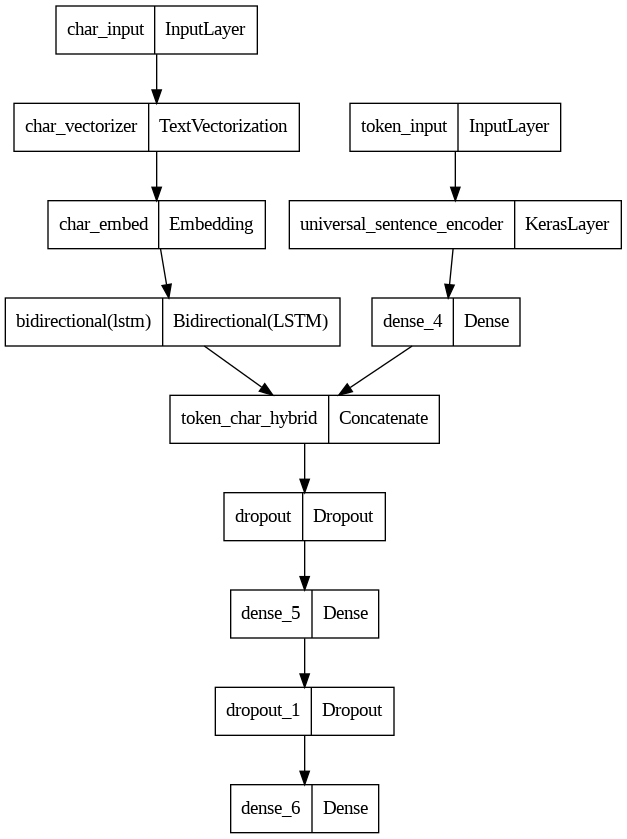

In [78]:
from tensorflow.keras.utils import plot_model
plot_model(model_4)

In [79]:
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [80]:
train_char_token_data=tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset=tf.data.Dataset.zip((train_char_token_data, train_char_token_labels))


train_char_token_dataset=train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_data=tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels=tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset=tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset=val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [81]:
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [82]:
model_4_history=model_4.fit(train_char_token_dataset,
                            steps_per_epoch=int(0.1*len(train_char_token_dataset)),
                            epochs=3,
                            validation_data=val_char_token_dataset,
                            validation_steps=int(0.1*len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 26s 35ms/step - loss: 0.9689 - accuracy: 0.6149 - val_loss: 0.7843 - val_accuracy: 0.6925
Epoch 2/3
562/562 [==============================] - 18s 32ms/step - loss: 0.7948 - accuracy: 0.6951 - val_loss: 0.7191 - val_accuracy: 0.7241
Epoch 3/3
562/562 [==============================] - 17s 31ms/step - loss: 0.7736 - accuracy: 0.7028 - val_loss: 0.6905 - val_accuracy: 0.7410


In [83]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 17s 18ms/step - loss: 0.6956 - accuracy: 0.7360


[0.695601224899292, 0.7360320687294006]

In [84]:
model_4_pred_probs=model_4.predict(val_char_token_dataset)
model_4_pred_probs

945/945 [==============================] - 16s 16ms/step


array([[4.3643308e-01, 3.1366286e-01, 3.0238472e-03, 2.4266975e-01,
        4.2103976e-03],
       [3.8068730e-01, 4.2376402e-01, 2.7719324e-03, 1.9109470e-01,
        1.6821062e-03],
       [2.9921493e-01, 1.4137764e-01, 4.8679322e-02, 4.8710167e-01,
        2.3626456e-02],
       ...,
       [7.1457814e-04, 8.1576342e-03, 7.1455769e-02, 3.7757156e-04,
        9.1929448e-01],
       [8.2134679e-03, 6.4280294e-02, 2.4793419e-01, 4.0021492e-03,
        6.7556989e-01],
       [4.0823853e-01, 3.7612292e-01, 1.5907355e-01, 2.6058698e-02,
        3.0506261e-02]], dtype=float32)

In [85]:
model_4_preds=tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 0])>

In [86]:
model_4_results=calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_4_preds)
model_4_results

{'accuracy': 73.60320402489077,
 'precision': 0.7363489285489488,
 'recall': 0.7360320402489077,
 'f1': 0.7340495250993672}

In [87]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [88]:
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

<Axes: ylabel='Frequency'>

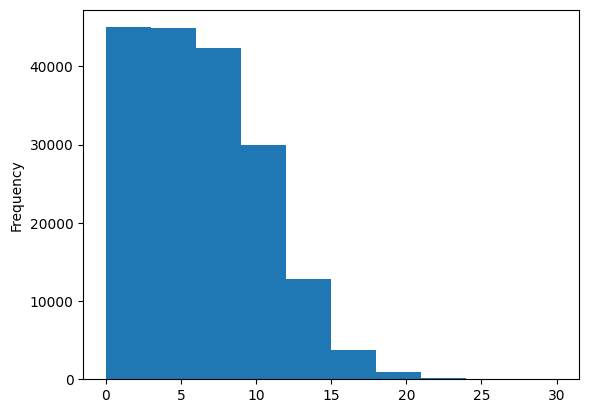

In [89]:
train_df.line_number.plot.hist()

In [90]:

train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

In [91]:
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:20]

(TensorShape([180040, 15]),
 <tf.Tensor: shape=(20, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.

In [92]:
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

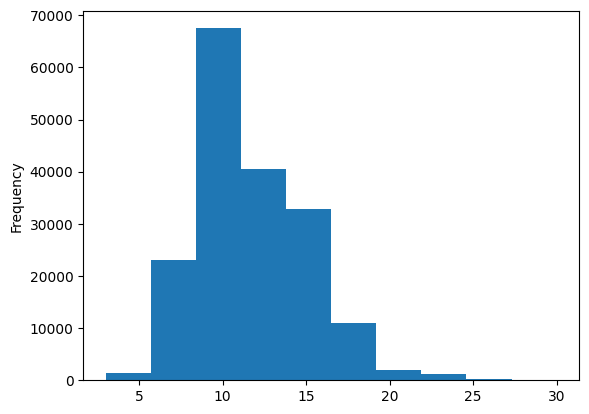

In [93]:
train_df.total_lines.plot.hist();

In [94]:
np.percentile(train_df.total_lines, 98)

20.0

In [95]:
train_total_lines_one_hot=tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot=tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot=tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

In [96]:

# 1. Token inputs
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)

# 2. Char inputs
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Line numbers inputs
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

# 4. Total lines inputs
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

# 5. Combine token and char embeddings into a hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output,
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# 6. Combine positional embeddings with combined token and char embeddings into a tribrid embedding
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

# 7. Create output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

# 8. Put together model
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)


In [97]:
model_5.summary()


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_inputs[0][0]']  

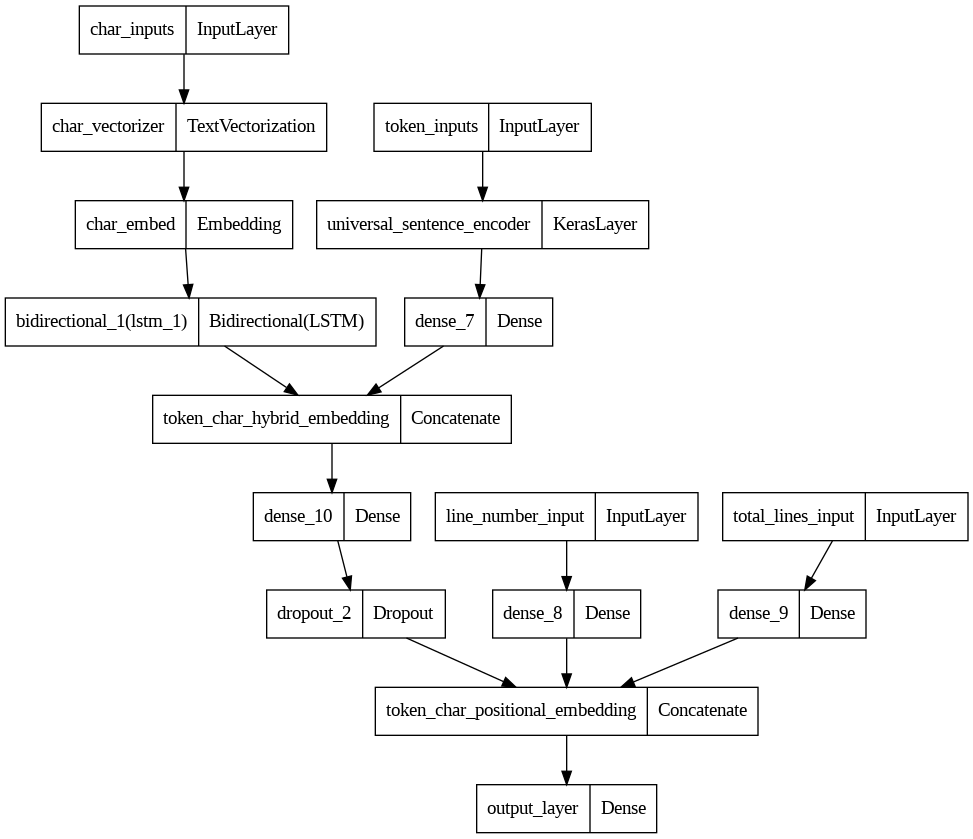

In [98]:
from tensorflow.keras.utils import plot_model
plot_model(model_5)

In [99]:
for layer in model_5.layers:
  print(layer, layer.trainable)


<keras.src.engine.input_layer.InputLayer object at 0x7e9a927c1c30> True
<keras.src.engine.input_layer.InputLayer object at 0x7e9a927c1d80> True
<keras.src.layers.preprocessing.text_vectorization.TextVectorization object at 0x7e9a0968af80> True
<tensorflow_hub.keras_layer.KerasLayer object at 0x7e9a94cb29e0> False
<keras.src.layers.core.embedding.Embedding object at 0x7e9a096c16c0> True
<keras.src.layers.core.dense.Dense object at 0x7e9a927c0ac0> True
<keras.src.layers.rnn.bidirectional.Bidirectional object at 0x7e9a95e5e050> True
<keras.src.layers.merging.concatenate.Concatenate object at 0x7e9a95fcc8e0> True
<keras.src.engine.input_layer.InputLayer object at 0x7e9a096c3d00> True
<keras.src.engine.input_layer.InputLayer object at 0x7e9a95d07bb0> True
<keras.src.layers.core.dense.Dense object at 0x7e9a95f0f730> True
<keras.src.layers.core.dense.Dense object at 0x7e9b16ba8190> True
<keras.src.layers.core.dense.Dense object at 0x7e9b16bd1ed0> True
<keras.src.layers.regularization.dropout.

In [100]:
# Compile token, char, positional embedding model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # add label smoothing (examples which are really confident get smoothed a little)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [101]:
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [102]:
# Fit the token, char and positional embedding model
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 25s 34ms/step - loss: 1.1066 - accuracy: 0.7181 - val_loss: 0.9865 - val_accuracy: 0.7999
Epoch 2/3
562/562 [==============================] - 19s 34ms/step - loss: 0.9676 - accuracy: 0.8150 - val_loss: 0.9494 - val_accuracy: 0.8295
Epoch 3/3
562/562 [==============================] - 18s 32ms/step - loss: 0.9499 - accuracy: 0.8240 - val_loss: 0.9387 - val_accuracy: 0.8341


In [103]:
model_5_pred_probs=model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_pred_probs

945/945 [==============================] - 17s 17ms/step


array([[0.4804526 , 0.1294654 , 0.01106423, 0.35819718, 0.0208206 ],
       [0.5678475 , 0.07197313, 0.03940583, 0.3132324 , 0.00754114],
       [0.2351795 , 0.09865956, 0.12663496, 0.4676939 , 0.07183214],
       ...,
       [0.03376223, 0.09794524, 0.03288648, 0.02794105, 0.807465  ],
       [0.02534729, 0.27599013, 0.0724444 , 0.02387387, 0.6023443 ],
       [0.21864647, 0.5745524 , 0.10366667, 0.0420502 , 0.06108424]],
      dtype=float32)

In [104]:
model_5_preds= tf.argmax(model_5_pred_probs, axis=1)
model_5_preds


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [105]:
model_5_results=calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_5_preds)
model_5_results

{'accuracy': 83.39401562293128,
 'precision': 0.8327490068227126,
 'recall': 0.8339401562293128,
 'f1': 0.8331047671808943}

In [106]:
all_model_results=pd.DataFrame({"baseline":baseline_results,
                                "custom_token_embed_conv1d":model_1_results,
                                "pretrained_token_embed":model_2_results,
                                "custom_char_embed_conv1d":model_3_results,
                                "hybrid_char_token_embed":model_4_results,
                                "tribrid_pos_char_token_embed":model_5_results})
all_model_results=all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,72.183238,0.718647,0.721832,0.698925
custom_token_embed_conv1d,78.637627,0.783460,0.786376,0.783857
pretrained_token_embed,71.600688,0.717177,0.716007,0.713203
custom_char_embed_conv1d,65.315107,0.646705,0.653151,0.646723
hybrid_char_token_embed,73.603204,0.736349,0.736032,0.734050
tribrid_pos_char_token_embed,83.394016,0.832749,0.833940,0.833105


In [107]:
all_model_results["accuracy"]=all_model_results["accuracy"]/100


In [108]:
all_model_results["accuracy"]=all_model_results["accuracy"]/100

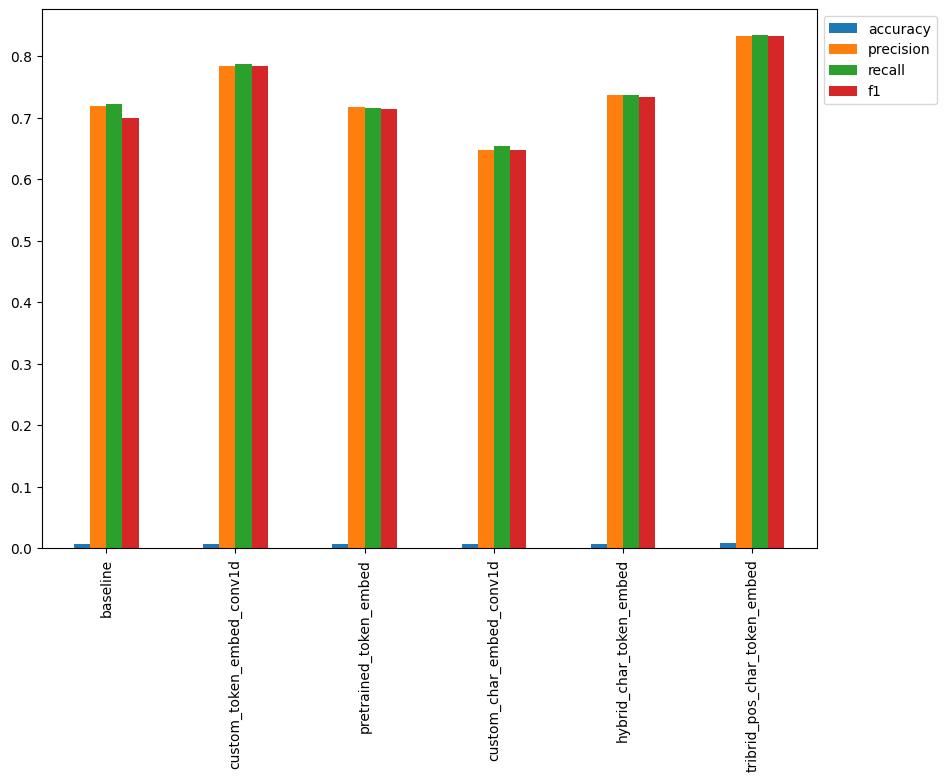

In [109]:
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));


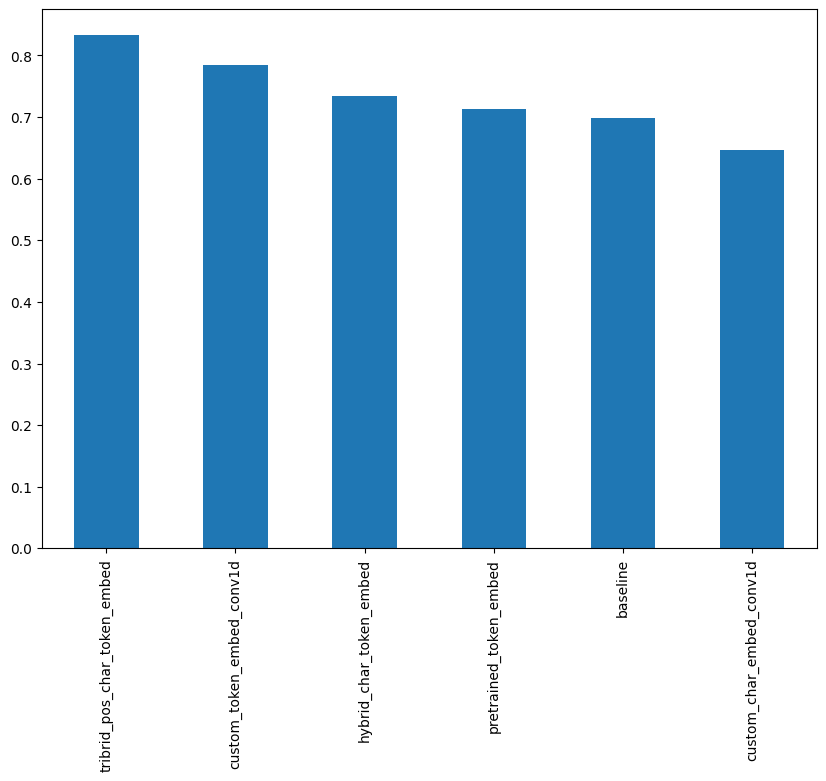

In [110]:
all_model_results.sort_values("f1",ascending=False)["f1"].plot(kind="bar",figsize=(10,7));


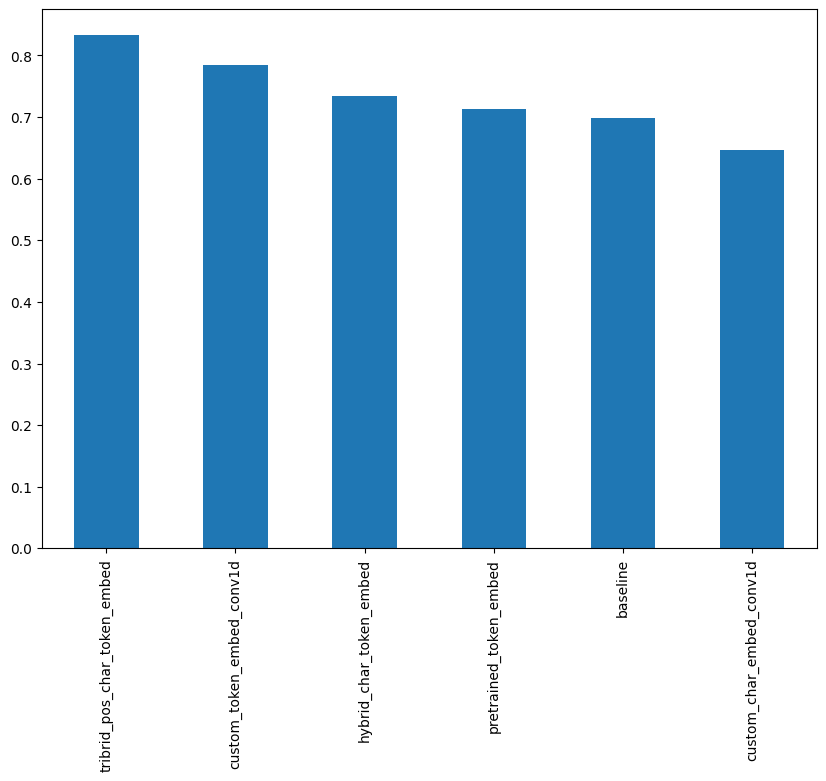

In [111]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7));

In [112]:
model_5.save("skimlit_tribrid_model")

In [113]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

model_path="skimlit_tribrid_model/"
loaded_model=tf.keras.models.load_model(model_path)

In [114]:
loaded_pred_probs=loaded_model.predict(val_pos_char_token_dataset, verbose=1)
loaded_preds=tf.argmax(loaded_pred_probs, axis=1)
loaded_preds[:10]

945/945 [==============================] - 17s 17ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1])>

In [115]:
loaded_model_results=calculate_results(val_labels_encoded,
                                       loaded_preds)
loaded_model_results

{'accuracy': 83.39401562293128,
 'precision': 0.8327490068227126,
 'recall': 0.8339401562293128,
 'f1': 0.8331047671808943}

In [116]:
np.isclose(list(model_5_results.values()), list(loaded_model_results.values()),rtol=1e-02 )


array([ True,  True,  True,  True])

In [117]:
loaded_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_inputs[0][0]']  

In [118]:
test_pos_char_token_data=tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                             test_total_lines_one_hot,
                                                             test_sentences,
                                                             test_chars))
test_pos_char_token_labels=tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset=tf.data.Dataset.zip((test_pos_char_token_data,test_pos_char_token_labels))
test_pos_char_token_dataset=test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_pos_char_token_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [119]:
test_pred_probs=loaded_model.predict(test_pos_char_token_dataset,
                                     verbose=1)
test_preds=tf.argmax(test_pred_probs, axis=1)
test_preds[:10]


942/942 [==============================] - 17s 18ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 3, 2, 2, 4, 4, 4, 1, 4, 0])>

In [120]:
loaded_model_test_results=calculate_results(y_true=test_labels_encoded,
                                            y_pred=test_preds)

In [121]:
loaded_model_test_results

{'accuracy': 82.82395885183341,
 'precision': 0.8269411770905835,
 'recall': 0.8282395885183341,
 'f1': 0.8274034077734297}

In [122]:
%%time
test_pred_classes=[label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

CPU times: user 13.8 s, sys: 909 ms, total: 14.7 s
Wall time: 13.8 s


['OBJECTIVE',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'RESULTS',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'METHODS',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS'

In [123]:
test_df["prediction"]=test_pred_classes
test_df["pred_prob"]=tf.reduce_max(test_pred_probs, axis=1).numpy()

In [124]:
test_df["correct"]=test_df["prediction"]==test_df["target"]
test_df.head(20)

,target,text,line_number,total_lines,prediction,pred_prob,correct
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8,OBJECTIVE,0.471416,False
1,RESULTS,a post hoc analysis was conducted with the use...,1,8,OBJECTIVE,0.340170,False
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8,METHODS,0.808541,False
3,RESULTS,survival analyses were used to assess the asso...,3,8,METHODS,0.734944,False
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8,RESULTS,0.730703,True
5,RESULTS,when mean hemodynamic profiles were compared i...,5,8,RESULTS,0.887849,True
6,RESULTS,multivariable analyses revealed that patients ...,6,8,RESULTS,0.533808,True
7,CONCLUSIONS,abnormal lfts are common in the adhf populatio...,7,8,CONCLUSIONS,0.539022,True
8,CONCLUSIONS,elevated meld-xi scores are associated with po...,8,8,RESULTS,0.461161,False
9,BACKGROUND,minimally invasive endovascular aneurysm repai...,0,12,BACKGROUND,0.564111,True


In [125]:
top_100_wrong=test_df[test_df["correct"]==False].sort_values("pred_prob",ascending=False)[:100]
top_100_wrong

,target,text,line_number,total_lines,prediction,pred_prob,correct
16347,BACKGROUND,to evaluate the effects of the lactic acid bac...,0,12,OBJECTIVE,0.943570,False
835,BACKGROUND,to assess the temporal patterns of late gastro...,0,11,OBJECTIVE,0.928550,False
2388,RESULTS,the primary endpoint is the cumulative three-y...,4,13,METHODS,0.924800,False
22375,RESULTS,patients were randomly assigned to receive eit...,4,12,METHODS,0.922558,False
13874,CONCLUSIONS,symptom outcomes will be assessed and estimate...,4,6,METHODS,0.921774,False
...,...,...,...,...,...,...,...
23200,RESULTS,the primary outcome is the appearance of incis...,4,6,METHODS,0.840025,False
23656,CONCLUSIONS,"time until stable health status , length of ca...",9,14,RESULTS,0.839651,False
2341,CONCLUSIONS,although group s showed a prolonged qtc interv...,8,9,RESULTS,0.839512,False
5395,RESULTS,diet was supplemented with @ @ ml milk-based f...,4,12,METHODS,0.839443,False


In [126]:
for row in top_100_wrong[0:10].itertuples():
  _, target, text, line_number, total_lines, prediction, pred_prob,_ =row
  print(f"Target: { target}, Pred:{prediction}, Prob:{pred_prob}, Line number:{line_number}, Total lines:{total_lines}\n")
  print(f"Text:\n{text}\n")
  print("______\n")

Target: BACKGROUND, Pred:OBJECTIVE, Prob:0.9435704350471497, Line number:0, Total lines:12

Text:
to evaluate the effects of the lactic acid bacterium lactobacillus salivarius on caries risk factors .

______

Target: BACKGROUND, Pred:OBJECTIVE, Prob:0.9285500049591064, Line number:0, Total lines:11

Text:
to assess the temporal patterns of late gastrointestinal ( gi ) and genitourinary ( gu ) radiotherapy toxicity and resolution rates in a randomised controlled trial ( all-ireland cooperative oncology research group @-@ ) assessing duration of neo-adjuvant ( na ) hormone therapy for localised prostate cancer .

______

Target: RESULTS, Pred:METHODS, Prob:0.9247999787330627, Line number:4, Total lines:13

Text:
the primary endpoint is the cumulative three-year hiv incidence .

______

Target: RESULTS, Pred:METHODS, Prob:0.9225583076477051, Line number:4, Total lines:12

Text:
patients were randomly assigned to receive either moxonidine ( @-@ @ mg daily ) or placebo , along with standar

In [127]:
import json
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json


--2024-03-24 13:50:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6737 (6.6K) [text/plain]
Saving to: ‘skimlit_example_abstracts.json’

skimlit_example_abs 100%[===================>]   6.58K  --.-KB/s    in 0s      

2024-03-24 13:50:46 (96.9 MB/s) - ‘skimlit_example_abstracts.json’ saved [6737/6737]



In [128]:
with open("skimlit_example_abstracts.json", "r") as f:
  example_abstracts =json.load(f)
example_abstracts

[{'abstract': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'source': 'https://pubmed.ncbi.nlm.nih.gov/20232240/',
  'details': 'RCT of a manualiz

In [129]:
abstracts =pd.DataFrame(example_abstracts)
abstracts

,abstract,source,details
0,This RCT examined the efficacy of a manualized...,https://pubmed.ncbi.nlm.nih.gov/20232240/,RCT of a manualized social treatment for high-...
1,Postpartum depression (PPD) is the most preval...,https://pubmed.ncbi.nlm.nih.gov/28012571/,Formatting removed (can be used to compare mod...
2,"Mental illness, including depression, anxiety ...",https://pubmed.ncbi.nlm.nih.gov/28942748/,Effect of nutrition on mental health
3,Hepatitis C virus (HCV) and alcoholic liver di...,https://pubmed.ncbi.nlm.nih.gov/22244707/,Baclofen promotes alcohol abstinence in alcoho...


In [130]:
from spacy.lang.en import English
nlp=English()

In [131]:
sentencizer=nlp.add_pipe("sentencizer")

doc=nlp(example_abstracts[0]["abstract"])
abstract_lines=[str(sent) for sent in list(doc.sents)]
abstract_lines

['This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
 'Participants were randomly assigned to treatment or wait-list conditions.',
 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
 'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
 'Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.']

In [132]:
total_lines_in_sample=len(abstract_lines)
sample_lines=[]
for i, line in enumerate(abstract_lines):
  sample_dict={}
  sample_dict["text"]=str(line)
  sample_dict["line_number"]=i
  sample_dict["total_lines"]=total_lines_in_sample -1
  sample_lines.append(sample_dict)
sample_lines

[{'text': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
  'line_number': 0,
  'total_lines': 7},
 {'text': 'Participants were randomly assigned to treatment or wait-list conditions.',
  'line_number': 1,
  'total_lines': 7},
 {'text': 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
  'line_number': 2,
  'total_lines': 7},
 {'text': 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
  'line_number': 3,
  'total_lines': 7},
 {'text': 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
  'line_number': 4,
  'total_lines': 7},
 {'text': 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
  'line_number': 5,
  'total_lines': 7},
 {'text'

In [133]:
test_abstract_line_numbers=[line["line_number"] for line in sample_lines]

test_abstract_line_numbers_one_hot=tf.one_hot(test_abstract_line_numbers,depth=15)
test_abstract_line_numbers_one_hot

<tf.Tensor: shape=(8, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [134]:
test_abstract_total_lines=[line["total_lines"] for line in sample_lines]
test_abstract_total_lines_one_hot=tf.one_hot(test_abstract_total_lines, depth=20)
test_abstract_total_lines_one_hot

<tf.Tensor: shape=(8, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [135]:
abstract_chars=[split_chars(sentence) for sentence in abstract_lines]
abstract_chars

['T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
 'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
 'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
 'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
 'S i g n i f i c a n t   t r e a t m e n t   e f f e c t s   w e r e   f o u n d   f o r   f i v e   o f   s e v e n   p 

In [136]:
%%time
test_abstract_pred_probs=loaded_model.predict(x=(test_abstract_line_numbers_one_hot,
                                                 test_abstract_total_lines_one_hot,
                                                 tf.constant(abstract_lines),
                                                 tf.constant(abstract_chars)))

1/1 [==============================] - 2s 2s/step
CPU times: user 1.61 s, sys: 8.42 ms, total: 1.62 s
Wall time: 1.67 s


In [137]:
test_abstract_pred_probs

array([[0.30794245, 0.09713614, 0.01568455, 0.551027  , 0.02820989],
       [0.07103468, 0.02589679, 0.74511915, 0.09560169, 0.06234773],
       [0.12716204, 0.04657721, 0.53628695, 0.20367749, 0.08629628],
       [0.11749984, 0.1645904 , 0.49227506, 0.08833919, 0.13729554],
       [0.0535131 , 0.09081916, 0.4201385 , 0.04679127, 0.388738  ],
       [0.03408377, 0.10288247, 0.56822217, 0.0521282 , 0.24268338],
       [0.03037821, 0.12309221, 0.07189573, 0.02426838, 0.7503655 ],
       [0.01770996, 0.10958599, 0.2729503 , 0.03109304, 0.56866074]],
      dtype=float32)

In [138]:
test_abstract_preds=tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([3, 2, 2, 2, 2, 2, 4, 4])>

In [139]:
test_abstract_pred_classes=[label_encoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes

['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS']

In [140]:
for i , line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")

OBJECTIVE: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
METHODS: Participants were randomly assigned to treatment or wait-list conditions.
METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
METHODS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
METHODS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
METHODS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
RESULTS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.
